In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
sns.set_style('whitegrid')

In [44]:
class FinancialInstrumentBase: # Parent class
    def __init__(self, ticker, start_date, end_date):
        self.data = None
        self._ticker = ticker
        self.start_date = start_date
        self.end_date = end_date
        self.get_data()
        self.log_returns()
    
    def __repr__(self):
        return f"FinancialInstrument({self._ticker}, {self.start_date}, {self.end_date})"
    
    def get_data(self):
        raw = yf.download(self._ticker, start=self.start_date, end=self.end_date).Close.to_frame()
        raw.rename(columns={'Close': 'price'}, inplace=True)
        self.data = raw
        
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price / self.data.price.shift(1))
    
    def plot_prices(self):
        self.data.price.plot(figsize=(12, 8), title=f"{self._ticker} Price", fontsize=15)
        plt.show()
    
    def plot_returns(self, kind='ts'):
        if kind == 'ts':
            self.data.log_returns.plot(figsize=(12, 8), title=f"{self._ticker} Log Returns", fontsize=15)
        elif kind == 'hist':
            self.data.log_returns.hist(figsize=(12, 8), bins= int(np.sqrt(len(self.data))), title=f"{self._ticker} Log Returns", fontsize=15)
    
    def set_ticker(self, ticker = None):
        if ticker is not None:
            self._ticker = ticker
            self.get_data()
            self.log_returns()

In [46]:
class RiskReturn(FinancialInstrumentBase):
    def __repr__(self):
        return f"RiskReturn({self._ticker}, {self.start_date}, {self.end_date})"
    
    def mean_return(self, freq = None):
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
    
    def std_returns(self, freq = None):
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
    
    def annualized_mean_return(self):
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print(f"Return: {mean_return} | Risk: {risk}")

In [49]:
stock = RiskReturn("AAPL", "2010-01-01", "2020-12-31")

[*********************100%%**********************]  1 of 1 completed


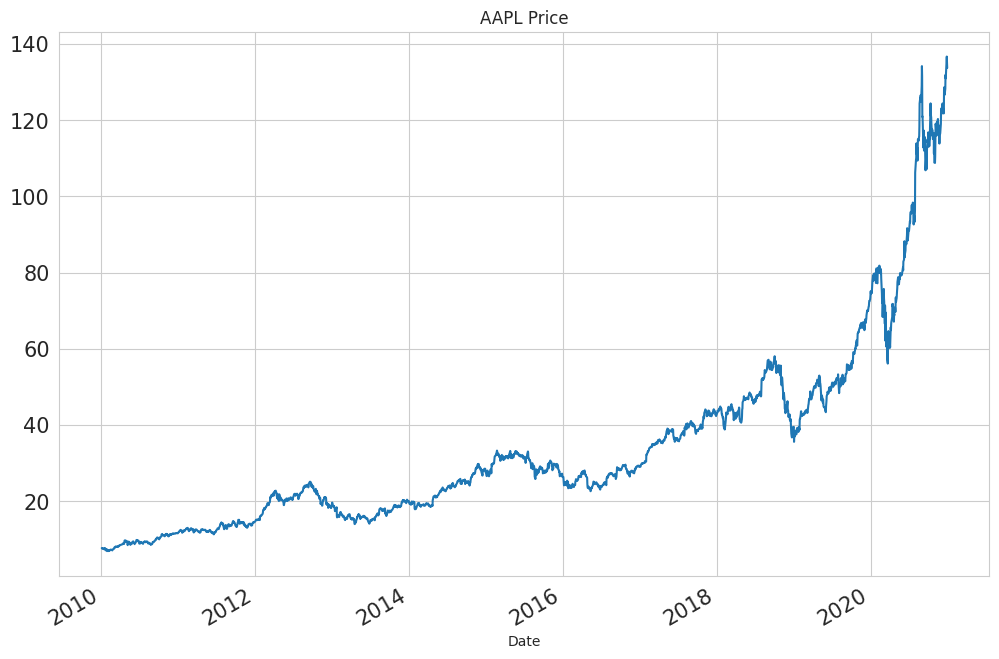

In [50]:
stock.plot_prices()

In [51]:
stock.set_ticker("GE")

[*********************100%%**********************]  1 of 1 completed


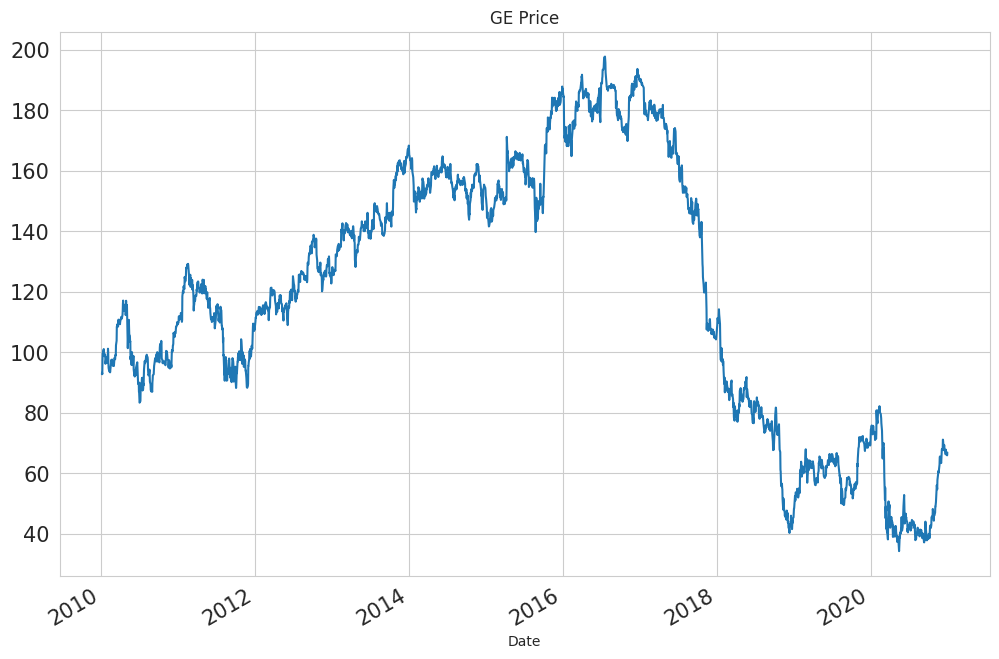

In [52]:
stock.plot_prices()

In [53]:
stock.mean_return()

-0.00011825457524070915

In [54]:
stock.std_returns("w")

0.0437353300661069

In [55]:
stock.annualized_mean_return()

Return: -0.03 | Risk: 0.316
